<a href="https://colab.research.google.com/github/lleejong/2019-KoreanUNIV-AI/blob/master/Image_Classification_(Full).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Lab

## Goal
본 실습의 목표는 딥러닝을 이용하여 간단한 이미지 분류기를 제작하는 것입니다. 이를 통해 이미지 처리를 위한 딥러닝 모델의 기본 구성 요소를 파악하고, 모델의 성능을 결정하는 몇 가지 요소들을 살펴볼 것입니다.

## Dataset
본 실습에서 사용할 데이터는 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 입니다. 이 데이터는 총 7만 장(Train 60,000, Test 10,000)의 이미지로 구성되어 있습니다. 각 이미지는 가로세로 28 픽셀의 흑백 이미지입니다. 

데이터 샘플:
<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST 데이터는 이미지 처리에서 첫 단계로 많이 활용되는 MNIST와 여러모로 유사합니다. Fashion MNIST 데이터는 기존 MNIST 데이터보다 약간 난이도가 높으면서도, 작은 이미지로 인해 빠르게 테스트를 수행할 수 있어서 새로운 이미지 처리 알고리즘의 작동 여부를 검증하는데 적절합니다.

TensorFlow에서는 Fashion MNIST 데이터를 다운로드하고 불러오기 위한 함수들을 제공합니다.
우선 TensorFlow 및 필요한 패키지들이 설치되어 있는지 확인해볼까요?

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.0-rc1


다음으로, 아래 코드를 통해 Fashion MNIST 데이터를 다운로드하고 불러올 수 있습니다.

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


함수 호출로부터 반환되는 4개의 값은 모두 numpy 행렬이며, 각 파일의 역할은 아래와 같습니다.


*   train_images: training set의 이미지
*   train_labels: training set의 정답값
*   test_images: test set의 이미지
*   test_labels: test set의 정답값

각 이미지는 앞서 언급한 대로 가로세로 28 픽셀의 흑백 이미지이며, 각 픽셀의 값은 0~255의 값을 갖고 있습니다. 정답값은 각 이미지가 어느 카테고리의 상품인지를 0~9의 숫자로 표현했으며, 각 숫자에 해당하는 상품 카테고리는 아래와 같습니다.

<table>
  <tr>
    <th>정답값</th>
    <th>카테고리</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

본 데이터셋은 MNIST와 마찬가지로 하나의 상품이 하나의 카테고리에만 속할 수 있습니다.

데이터셋이 어떻게 구성되어 있는지, 다음 코드를 통해 확인해봅시다.

Training set의 이미지 개수: 60000
Test set의 이미지 개수: 10000
이미지 크기: 28 X 28
정답값 예시: [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
이미지 값 예시: 
[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078431 0.7372549
  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353
  0.52156863 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215686 0.53333333 0.85882353 0.84705882 0.89411765
  0.9254902  1.         1.         1.         1.         0.85098039
  0.84313725 0.99607843 0.90588235 0.62745098 0.17647059 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.69019608 0.87058824 0.87843137 0.83137255 0.79607843 0.77647059
  0.76862745 0.78431373 0.84313725 0.8        0.79215686 0.78823529
  0.78823529 0.78823529 0.81960784 0.85490196 0.878431

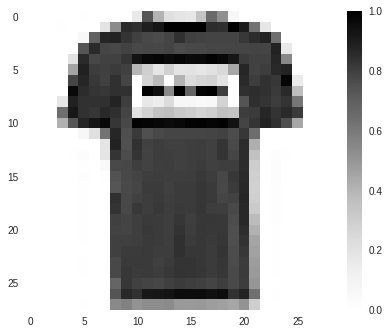

In [0]:
print("Training set의 이미지 개수: %d" %train_images.shape[0])
print("Test set의 이미지 개수: %d" %test_images.shape[0])
print("이미지 크기: %d X %d" %(train_images.shape[1], train_images.shape[2]))
print("정답값 예시: %s" %str(train_labels[:20]))
print("이미지 값 예시: \n%s" %str(train_images[1]))
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

아래 코드를 통해 training set의 첫 25장의 이미지와 각각의 카테고리를 확인할 수 있습니다.

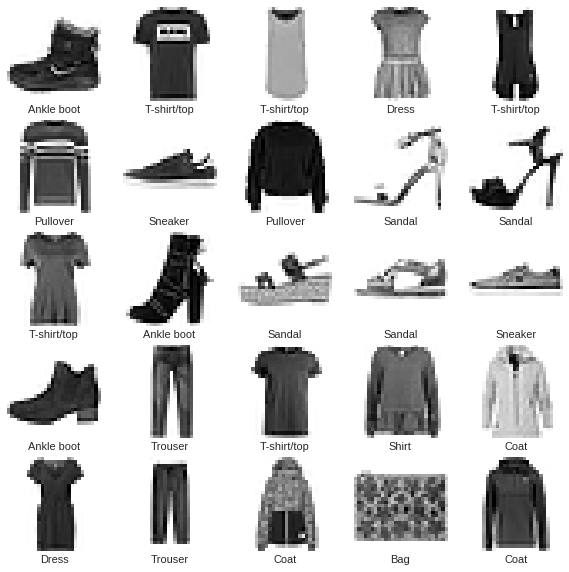

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

마지막으로, 데이터의 값을 신경망 입력으로 사용하기 적절하도록 정규화합시다. 각 픽셀의 값이 0~1의 실수값이 되도록 255로 나누어줍니다.

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## 초기 모델 생성

데이터가 준비되었으니, 이제 이를 이용하여 훈련시킬 신경망 모델을 만들어봅시다. 대부분의 신경망 모델은 여러 layer를 순차적으로 이어서 만듭니다. 

본 실습에서는 이 과정을 추상화시켜 모델 설계를 쉽게 해주는 tf.keras를 이용할 것입니다. keras.Sequential은 layer들의 배열을 하나의 모델로 이어줍니다.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

NameError: ignored

여기서 keras.layers.Flatten은 2차원 이미지(28 X 28 픽셀)를 1차원 벡터(784차원)로 만들어주는 역할이며, 별도의 학습을 위한 파라미터는 없습니다.

keras.layers.Dense는 가장 기본적인 신경망 구조인 fully connected layer를 나타냅니다. 여기서 사용된 activation function인 tf.nn.softmax는 모델의 출력을 확률분포로 바꾸어주는 역할로, 일반적으로 신경망 모델의 마지막 layer에 사용됩니다.

## 모델 훈련
이제 모델의 손실 함수(loss function)와 파라미터 최적화 방법을 정의할 차례입니다. 이는 다음 명령어로 수행할 수 있습니다.

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

그 다음, 모델을 훈련시킵니다. 훈련은 입력으로부터 출력을 계산하는 forward pass와, 손실 함수로부터 gradient를 계산하고 이를 바탕으로 파라미터를 업데이트하는 backward pass를 반복하는 과정으로 진행됩니다.

이러한 과정은 아래 명령어를 통해 수행됩니다.

In [0]:
history = model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels)
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.6057 - acc: 0.7960 - val_loss: 0.5290 - val_acc: 0.8175
Epoch 2/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.4616 - acc: 0.8425 - val_loss: 0.4779 - val_acc: 0.8321
Epoch 3/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.4349 - acc: 0.8507 - val_loss: 0.4653 - val_acc: 0.8390
Epoch 4/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.4221 - acc: 0.8539 - val_loss: 0.4637 - val_acc: 0.8396
Epoch 5/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.4141 - acc: 0.8560 - val_loss: 0.4588 - val_acc: 0.8399
Epoch 6/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.4065 - acc: 0.8598 - val_loss: 0.4520 - val_acc: 0.8418
Epoch 7/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.4017 - acc: 0.8598 - val_l

여기서 epochs는 훈련을 얼마나 많이 시킬지를 나타냅니다. 전체 데이터에 대해 1회 훈련을 마치는 것을 1 epoch라고 합니다. 따라서 5 epochs는 전체 데이터에 대해 총 5회 반복 훈련시킨 것이라고 이해할 수 있습니다.

fit() 메소드로부터 반환되는 history에는 모델의 훈련 과정에 대한 정보가 담겨 있습니다. 여기에는 training set과 test set에 대한 손실 함수의 값도 포함되어 있습니다. 아래 코드를 이용하여 이를 확인해봅시다.

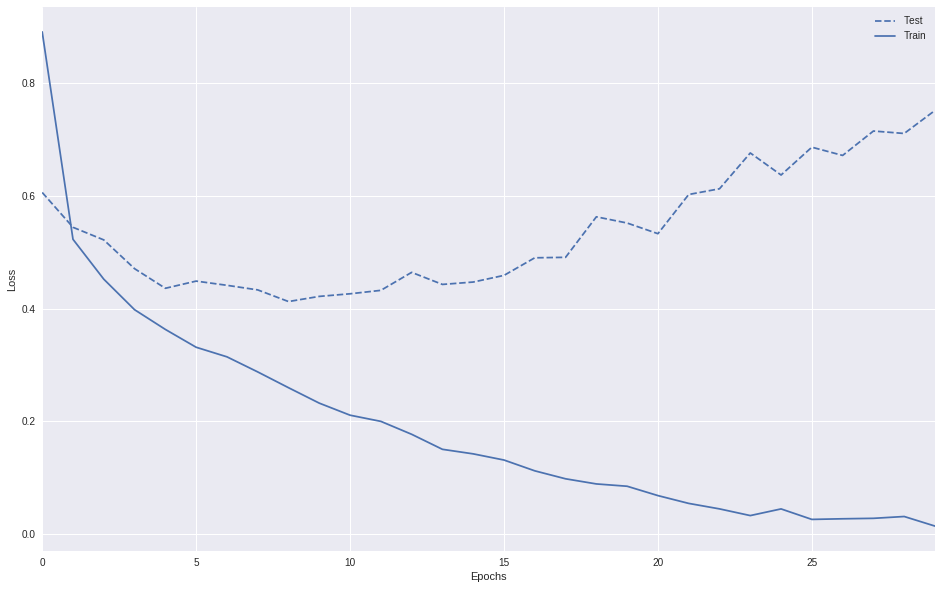

In [0]:
def plot_loss(history):
  plt.figure(figsize=(16,10))
  val = plt.plot(history.epoch, history.history['val_loss'],
                 '--', label='Test')
  plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(),
           label='Train')

  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.legend()

  plt.xlim([0,max(history.epoch)])

plot_loss(history)

## 모델 성능 평가

훈련된 모델의 성능을 평가하기 위해 test set을 이용합니다. training set과 분리된 별도의 데이터를 이용해 성능을 평가하는 이유는 모델의 새로운 데이터에 대한 대응 능력을 확인하기 위한 것입니다. 이를 generalization이라고 합니다.

성능 평가는 아래 명령어를 통해 수행할 수 있습니다.

In [0]:
def eval_model(model):
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  print('Test accuracy:', test_acc)
  
eval_model(model)

10000/10000 [==============================] - 1s 84us/sample - loss: 0.7517 - acc: 0.8615
Test accuracy: 0.8615


현재 단계에서는 약 84% 안팎의 성능이 나타날 것입니다. 

모델의 파라미터는 훈련되기 전 무작위 값으로 초기화되는데, 초기화 값에 따라 훈련된 모델의 성능이 달라집니다. 따라서 동일한 모델이라도 학습할 때마다 성능에 편차가 생깁니다.

## Multi-Layer Perceptron(MLP)

앞서 만들었던 모델에 은닉층을 추가하여 성능을 올려봅시다. 활성함수는 tf.nn.tanh를 사용하겠습니다.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

그 다음으로 앞서 진행했던 [모델 훈련](#scrollTo=IfHQVj5g0iFo)과 [모델 성능 평가](#scrollTo=u8etrDl61kQH&line=5&uniqifier=1) 부분을 다시 실행하여 변경된 모델의 성능을 측정해봅시다.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.4928 - acc: 0.8210 - val_loss: 0.4287 - val_acc: 0.8415
Epoch 2/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.3803 - acc: 0.8588 - val_loss: 0.4028 - val_acc: 0.8486
Epoch 3/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.3468 - acc: 0.8715 - val_loss: 0.3913 - val_acc: 0.8623
Epoch 4/10
60000/60000 [==============================] - 12s 195us/sample - loss: 0.3319 - acc: 0.8775 - val_loss: 0.3619 - val_acc: 0.8683
Epoch 5/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.3125 - acc: 0.8843 - val_loss: 0.3707 - val_acc: 0.8676
Epoch 6/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.3027 - acc: 0.8886 - val_loss: 0.3857 - val_acc: 0.8686
Epoch 7/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.2967 - acc: 0.8894 

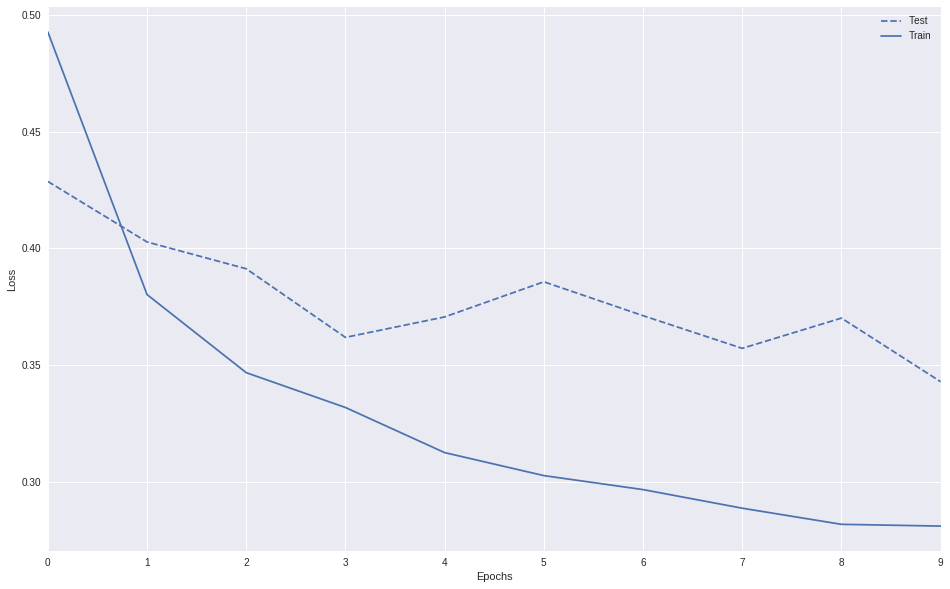

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels)
         )

plot_loss(history)
eval_model(model)

약 87% 안팎의 성능이 나올 것입니다.

은닉층을 더 많이 추가하면 성능이 더 올라갈까요? 은닉층의 수를 더 늘려보겠습니다.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 437us/sample - loss: 0.7730 - acc: 0.7285 - val_loss: 0.6551 - val_acc: 0.7779
Epoch 2/10
60000/60000 [==============================] - 24s 406us/sample - loss: 0.6802 - acc: 0.7513 - val_loss: 0.6506 - val_acc: 0.7511
Epoch 3/10
60000/60000 [==============================] - 25s 411us/sample - loss: 0.6740 - acc: 0.7536 - val_loss: 0.5971 - val_acc: 0.7872
Epoch 4/10
60000/60000 [==============================] - 25s 412us/sample - loss: 0.6190 - acc: 0.7729 - val_loss: 0.6103 - val_acc: 0.7498
Epoch 5/10
60000/60000 [==============================] - 25s 416us/sample - loss: 0.6061 - acc: 0.7764 - val_loss: 0.6506 - val_acc: 0.7732
Epoch 6/10
60000/60000 [==============================] - 25s 415us/sample - loss: 0.5615 - acc: 0.7987 - val_loss: 0.6273 - val_acc: 0.7521
Epoch 7/10
60000/60000 [==============================] - 25s 415us/sample - loss: 0.5491 - acc: 0.8076 

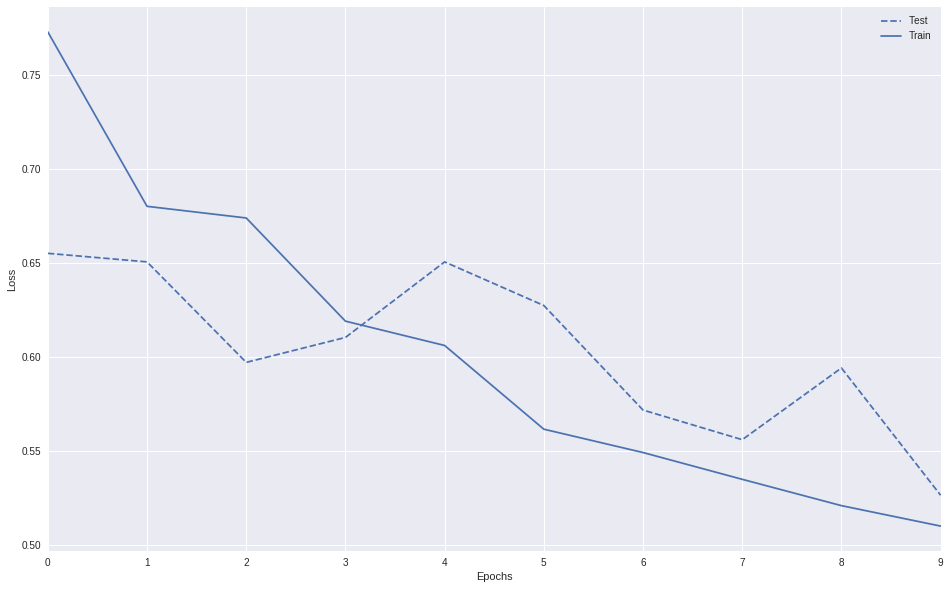

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels)
         )

plot_loss(history)
eval_model(model)

앞서 진행했던 [모델 훈련](#scrollTo=IfHQVj5g0iFo)과 [모델 성능 평가](#scrollTo=u8etrDl61kQH&line=5&uniqifier=1) 과정을 수행하면 약 80% 안팎의 성능이 나올 것입니다. 왜 오히려 성능이 더 떨어졌을까요?

## ReLU 사용

활성 함수를 ReLU (tf.nn.relu)로 변경해봅시다. 여기서 모델의 출력을 확률분포로 바꿔주는 softmax 활성함수는 변경하면 안됩니다.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels)
         )

plot_loss(history)
eval_model(model)

[모델 훈련](#scrollTo=IfHQVj5g0iFo)과 [모델 성능 평가](#scrollTo=u8etrDl61kQH&line=5&uniqifier=1) 과정을 수행하면 약 87% 안팎의 성능이 나올 것입니다. Vanishing gradient 문제는 많이 해소가 되었지만, layer가 적을 때와 비교해서 성능 향상이 거의 없습니다. 결과적으로 불필요하게 모델의 파라미터만 크게 증가하게 되었습니다. 이는 느린 학습 속도에서도 잘 나타납니다.

## Convolutional Neural Network으로 변경

모델 구조를 fully connected network에서 convolutional neural network(CNN)으로 변경해봅시다. 여기서 사용할 2차원 CNN은 1차원 벡터를 입력으로 사용하지 않기 때문에 최초의 keras.layers.Flatten은 제거해야 합니다. 

컬러 이미지의 경우 3차원(가로, 세로, 색상)으로 구성됩니다. 하지만 본 데이터는 흑백이므로 2차원(가로, 세로)로 구성되어 있습니다. CNN은 컬러 이미지를 만들어져 있으므로 우리의 데이터도 3차원으로 변형시켜줘야 합니다. 이를 위해 keras.layers.Reshape을 최초 layer로 사용합니다.

CNN layer의 출력은 3차원이므로 이를 확률분포로 바꾸기 위해서는 이를 1차원으로 바꿔줘야 합니다. 이를 위해 Flatten layer를 CNN와 Dense layer 사이에 추가합니다. 

마지막 softmax layer는 이전과 동일하게 유지하면 됩니다.

아래의 네트워크 구조가 만들어지도록 필요한 layer들을 배열해보시기 바랍니다. Convolution과 pooling을 더 추가하는것도 가능합니다.

<table>
  <tr><td>
    <img src="http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM-1024x279.png"
         alt="Fashion MNIST sprite"  width="100%">
  </td></tr>
</table>


다음 layer들을 잘 활용해보세요.

*   [tf.keras.layers.Reshape](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Reshape)
*   [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
*   [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)
*   [tf.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
*   [tf.keras.layers.MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)


In [0]:
model = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(16, 3, padding="same", activation=tf.nn.relu),
    keras.layers.MaxPool2D(2, padding="same"),
    keras.layers.Conv2D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.MaxPool2D(2, padding="same"),
    keras.layers.Conv2D(64, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Flatten(input_shape=(7, 7)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.4196 - acc: 0.8480 - val_loss: 0.3257 - val_acc: 0.8824
Epoch 2/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.2797 - acc: 0.8963 - val_loss: 0.2830 - val_acc: 0.8962
Epoch 3/10
60000/60000 [==============================] - 15s 256us/sample - loss: 0.2384 - acc: 0.9114 - val_loss: 0.2691 - val_acc: 0.9004
Epoch 4/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.2078 - acc: 0.9212 - val_loss: 0.2524 - val_acc: 0.9070
Epoch 5/10
60000/60000 [==============================] - 15s 253us/sample - loss: 0.1791 - acc: 0.9327 - val_loss: 0.2535 - val_acc: 0.9118
Epoch 6/10
60000/60000 [==============================] - 15s 253us/sample - loss: 0.1534 - acc: 0.9416 - val_loss: 0.2848 - val_acc: 0.9025
Epoch 7/10
60000/60000 [==============================] - 15s 251us/sample - loss: 0.1327 - acc: 0.9501 

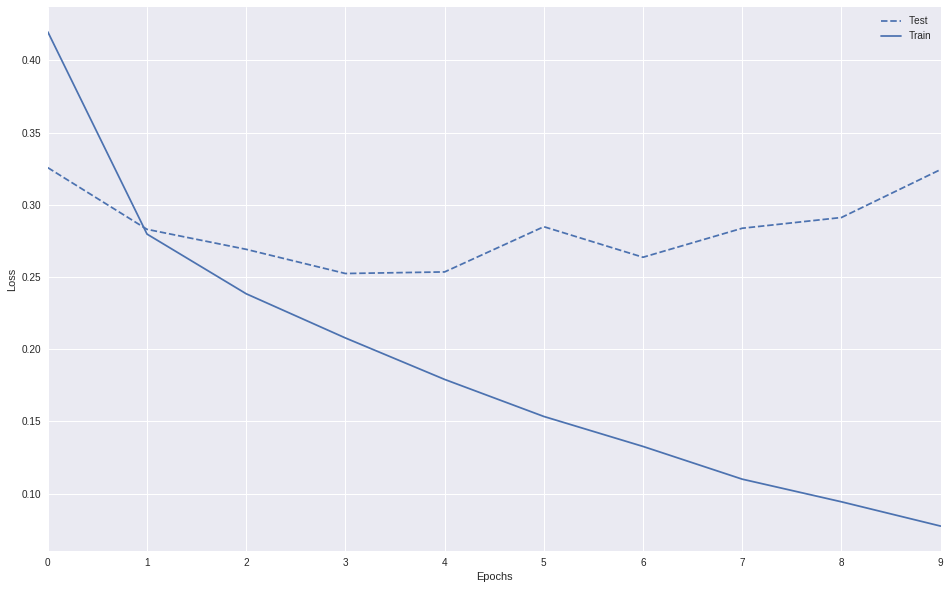

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels)
         )

plot_loss(history)
eval_model(model)

[모델 훈련](#scrollTo=IfHQVj5g0iFo)과 [모델 성능 평가](#scrollTo=u8etrDl61kQH&line=5&uniqifier=1) 과정을 수행하면 약 90% 안팎의 성능이 나올 것입니다. 더 적은 수의 파라미터로 더 높은 성능을 끌어낼 수 있었습니다.

## Overfitting 문제 및 해소 방법

모델이 overfitting되는 상황 및 해소 방법을 실습해보겠습니다.

우선, overfitting 현상이 나타나도록 training set의 크기를 축소시킨 후 더 긴 시간동안 훈련을 진행해보겠습니다.
모델은 CNN을 이용한 것으로 사용하겠습니다.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images[:2000],
          train_labels[:2000],
          epochs=30,
          validation_data=(test_images, test_labels)
         )

Train on 2000 samples, validate on 10000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 1.0630 - acc: 0.6340 - val_loss: 0.6246 - val_acc: 0.7664
Epoch 2/30
2000/2000 [==============================] - 2s 757us/sample - loss: 0.5701 - acc: 0.8010 - val_loss: 0.5484 - val_acc: 0.7963
Epoch 3/30
2000/2000 [==============================] - 2s 755us/sample - loss: 0.4669 - acc: 0.8355 - val_loss: 0.5460 - val_acc: 0.8008
Epoch 4/30
2000/2000 [==============================] - 2s 757us/sample - loss: 0.3951 - acc: 0.8640 - val_loss: 0.4803 - val_acc: 0.8291
Epoch 5/30
2000/2000 [==============================] - 1s 750us/sample - loss: 0.3440 - acc: 0.8735 - val_loss: 0.5033 - val_acc: 0.8266
Epoch 6/30
2000/2000 [==============================] - 1s 747us/sample - loss: 0.3100 - acc: 0.8895 - val_loss: 0.4844 - val_acc: 0.8315
Epoch 7/30
2000/2000 [==============================] - 1s 743us/sample - loss: 0.2719 - acc: 0.9000 - val_loss: 0.4988 - val

10000/10000 [==============================] - 1s 103us/sample - loss: 0.8472 - acc: 0.8506
Test accuracy: 0.8506


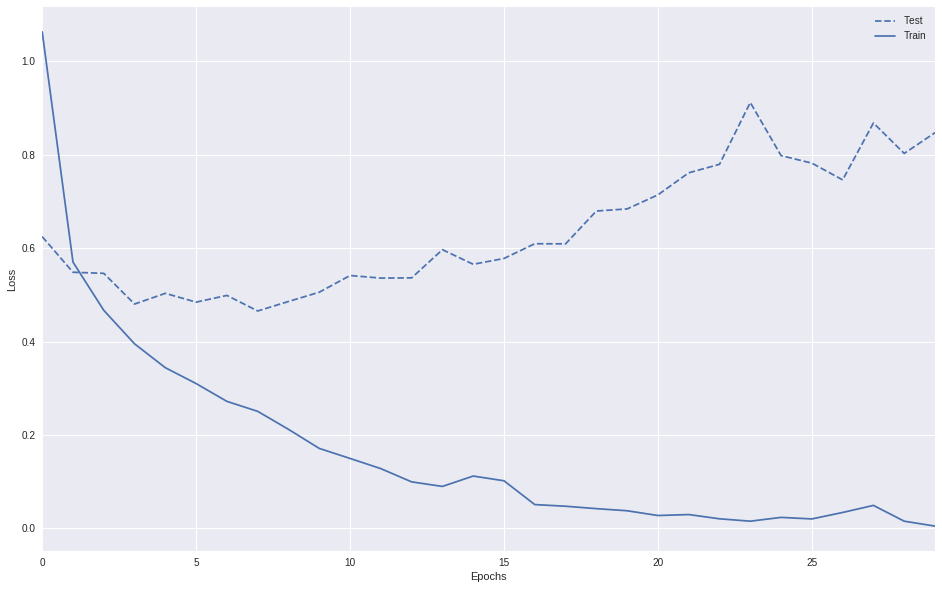

In [0]:
plot_loss(history)
eval_model(model)

Training set에 대한 손실함수의 값은 꾸준히 하락한 반면, test set에 대한 손실함수의 값은 어느 정도 하락하다가 다시 상승하는 것을 확인할 수 있습니다. 이는 전형적인 overfitting의 형상입니다.

모델에 [tf.keras.layers.Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)을 추가해봅시다.

In [0]:
drop_rate = 0.5

model = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(16, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(rate=drop_rate),
    keras.layers.MaxPool2D(2, padding="same"),
    keras.layers.Conv2D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(rate=drop_rate),
    keras.layers.MaxPool2D(2, padding="same"),
    keras.layers.Conv2D(64, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(rate=drop_rate),
    keras.layers.Flatten(input_shape=(7, 7)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images[:2000],
          train_labels[:2000],
          epochs=30,
          validation_data=(test_images, test_labels)
         )

Train on 2000 samples, validate on 10000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/sample - loss: 1.0972 - acc: 0.6155 - val_loss: 0.9362 - val_acc: 0.7450
Epoch 2/30
2000/2000 [==============================] - 2s 844us/sample - loss: 0.6664 - acc: 0.7625 - val_loss: 0.9396 - val_acc: 0.7627
Epoch 3/30
2000/2000 [==============================] - 2s 841us/sample - loss: 0.5614 - acc: 0.7930 - val_loss: 0.8069 - val_acc: 0.7922
Epoch 4/30
2000/2000 [==============================] - 2s 846us/sample - loss: 0.4984 - acc: 0.8140 - val_loss: 0.7000 - val_acc: 0.8066
Epoch 5/30
2000/2000 [==============================] - 2s 836us/sample - loss: 0.4894 - acc: 0.8170 - val_loss: 0.6526 - val_acc: 0.8257
Epoch 6/30
2000/2000 [==============================] - 2s 839us/sample - loss: 0.4404 - acc: 0.8410 - val_loss: 0.6338 - val_acc: 0.8231
Epoch 7/30
2000/2000 [==============================] - 2s 839us/sample - loss: 0.4162 - acc: 0.8465 - val_loss: 0.6710 - val

10000/10000 [==============================] - 1s 115us/sample - loss: 0.4610 - acc: 0.8406
Test accuracy: 0.8406


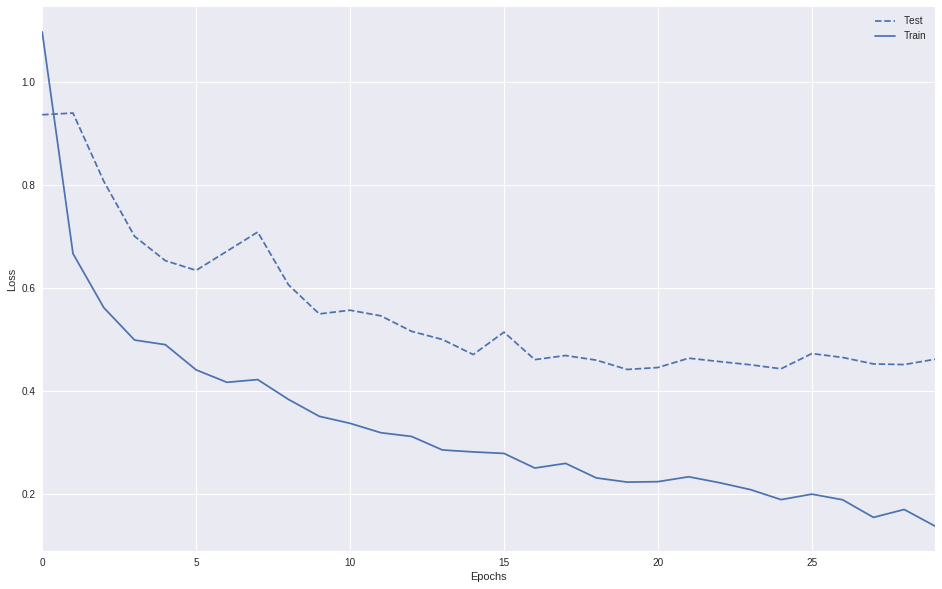

In [0]:
plot_loss(history)
eval_model(model)